<a href="https://colab.research.google.com/github/Harshit-tech9/fashion_MNIST_pytorch/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from torchvision import datasets, transforms
from torch import nn
import torch.nn.functional as F
from torch import optim

In [41]:
# Define a transform to normalize a data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the training data
trainset = datasets.FashionMNIST('Fashion-MNIST_data/', download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the testing data
testset = datasets.FashionMNIST('Fashion-MNIST_data/', download = True, train = False, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [42]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

print(labels.unique())

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


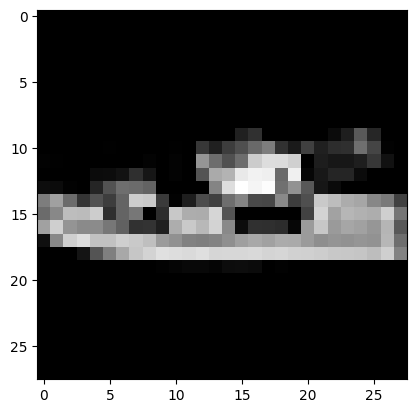

In [43]:
plt.imshow(images[10].numpy().squeeze(), cmap='Greys_r')

In [63]:
class fashion_MNIST(nn.Module):
  def __init__(self, input_dim, hidden_dim_1, hidden_dim_2, hidden_dim_3, output_dim):
    super(fashion_MNIST, self).__init__()

    # hidden layer 1
    self.layer_1 = nn.Linear(input_dim, hidden_dim_1)

    # hidden layer 2
    self.layer_2 = nn.Linear(hidden_dim_1, hidden_dim_2)

    # hidden layer 3
    self.layer_3 = nn.Linear(hidden_dim_2, hidden_dim_3)

    # Hidden layer 4
    self.layer_4 = nn.Linear(hidden_dim_3, output_dim)

    self.dropout = nn.Dropout(p=0.2)

  def forward(self, x):
    # Flattening the tensor

    x = x.view(x.shape[0], -1)
    x = self.dropout(F.relu(self.layer_1(x)))
    x = self.dropout(F.relu(self.layer_2(x)))
    x = self.dropout(F.relu(self.layer_3(x)))
    x = F.log_softmax(self.layer_4(x), dim = 1)

    return x

In [45]:
input_dim    = 784
hidden_dim_1 = 256
hidden_dim_2 = 128
hidden_dim_3 = 64
output_dim   = 10

model = fashion_MNIST(input_dim, hidden_dim_1, hidden_dim_2, hidden_dim_3, output_dim)
print(model)

fashion_MNIST(
  (layer_1): Linear(in_features=784, out_features=256, bias=True)
  (layer_2): Linear(in_features=256, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=64, bias=True)
  (layer_4): Linear(in_features=64, out_features=10, bias=True)
)


In [46]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

epoch = 20

for e in range(epoch):
  mnist_loss = 0
  for images, labels in trainloader:
    # images = images.view(images.shape[0], -1)

    optimizer.zero_grad()

    logits = model.forward(images)

    loss = criterion(logits, labels)
    loss.backward()
    optimizer.step()

    mnist_loss += loss.item()

  else:
    print(f'Training loss: ', mnist_loss)


Training loss:  489.18349328637123
Training loss:  353.3912955671549
Training loss:  317.66679522395134
Training loss:  294.92093712836504
Training loss:  275.38856326043606
Training loss:  262.1281870827079
Training loss:  247.7838076800108
Training loss:  237.8092933371663
Training loss:  227.3163345977664
Training loss:  217.2721774764359
Training loss:  206.75217991694808
Training loss:  200.76464053615928
Training loss:  191.14824476465583
Training loss:  185.29860184714198
Training loss:  176.3646095301956
Training loss:  167.0571224167943
Training loss:  165.0426264014095
Training loss:  155.29856120608747
Training loss:  151.38104036822915
Training loss:  144.86944327503443


In [47]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

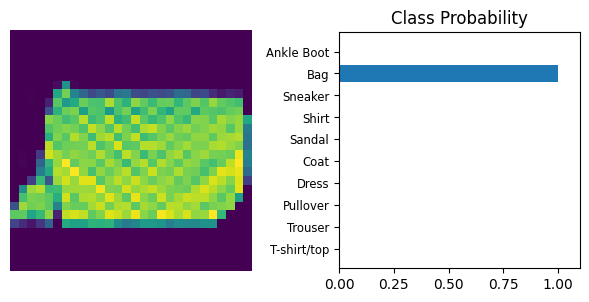

In [48]:
images, labels = next(iter(trainloader))
img = images[10].view(1, 784)

with torch.no_grad():
  logits = model.forward(img)

ps = F.softmax(logits, dim=1)
view_classify(img.view(1,28,28), ps, version = 'Fashion')

# Inference and Validation

topk method to get more likely class

In [49]:
model2 = fashion_MNIST(input_dim, hidden_dim_1, hidden_dim_2, hidden_dim_3, output_dim)
images, labels = next(iter(testloader))
ps = torch.exp(model2(images))

In [50]:
top_p, top_class = ps.topk(1, dim=1)
print(top_p[:10, :])
print(top_class[:10, :])

tensor([[0.1095],
        [0.1143],
        [0.1120],
        [0.1105],
        [0.1110],
        [0.1101],
        [0.1123],
        [0.1079],
        [0.1125],
        [0.1122]], grad_fn=<SliceBackward0>)
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]])


In [51]:
equals = top_class == labels.view(*top_class.shape)

In [52]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100} %')

Accuracy: 4.6875 %


In [66]:
model = fashion_MNIST(input_dim, hidden_dim_1, hidden_dim_2, hidden_dim_3, output_dim)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

epoch = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epoch):
  mnist_loss = 0
  for images, labels in trainloader:
    # images = images.view(images.shape[0], -1)

    optimizer.zero_grad()

    logits = model(images)

    loss = criterion(logits, labels)
    loss.backward()
    optimizer.step()

    mnist_loss += loss.item()

  else:
    test_loss = 0
    accuracy = 0

    with torch.no_grad():

      model.eval()

      for images, labels in testloader:
        logits = model.forward(images)
        loss = criterion(logits, labels)
        test_loss += loss.item()

        ps = torch.exp(model(images))
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))

      # setting model to train
      model.train()

    mnist = mnist_loss/len(trainloader)
    test = test_loss/len(testloader)

    train_losses.append(mnist)
    test_losses.append(test)

    print("Epoch: {}/{}..".format(e+1, epoch),
          "Training loss: {:.3f}..".format(mnist_loss/len(trainloader)),
          "Testing loss: {:.3f}..".format(test_loss/len(testloader)),
          "Test Accuracy: {:.3f}..".format(accuracy/len(testloader)))

Epoch: 1/30.. Training loss: 0.598.. Testing loss: 0.464.. Test Accuracy: 0.830..
Epoch: 2/30.. Training loss: 0.433.. Testing loss: 0.403.. Test Accuracy: 0.855..
Epoch: 3/30.. Training loss: 0.400.. Testing loss: 0.381.. Test Accuracy: 0.861..
Epoch: 4/30.. Training loss: 0.373.. Testing loss: 0.397.. Test Accuracy: 0.851..
Epoch: 5/30.. Training loss: 0.355.. Testing loss: 0.367.. Test Accuracy: 0.868..
Epoch: 6/30.. Training loss: 0.339.. Testing loss: 0.378.. Test Accuracy: 0.862..
Epoch: 7/30.. Training loss: 0.330.. Testing loss: 0.361.. Test Accuracy: 0.874..
Epoch: 8/30.. Training loss: 0.323.. Testing loss: 0.353.. Test Accuracy: 0.869..
Epoch: 9/30.. Training loss: 0.312.. Testing loss: 0.342.. Test Accuracy: 0.876..
Epoch: 10/30.. Training loss: 0.305.. Testing loss: 0.355.. Test Accuracy: 0.874..
Epoch: 11/30.. Training loss: 0.296.. Testing loss: 0.344.. Test Accuracy: 0.879..
Epoch: 12/30.. Training loss: 0.294.. Testing loss: 0.345.. Test Accuracy: 0.878..
Epoch: 13/30.

In [67]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

[]

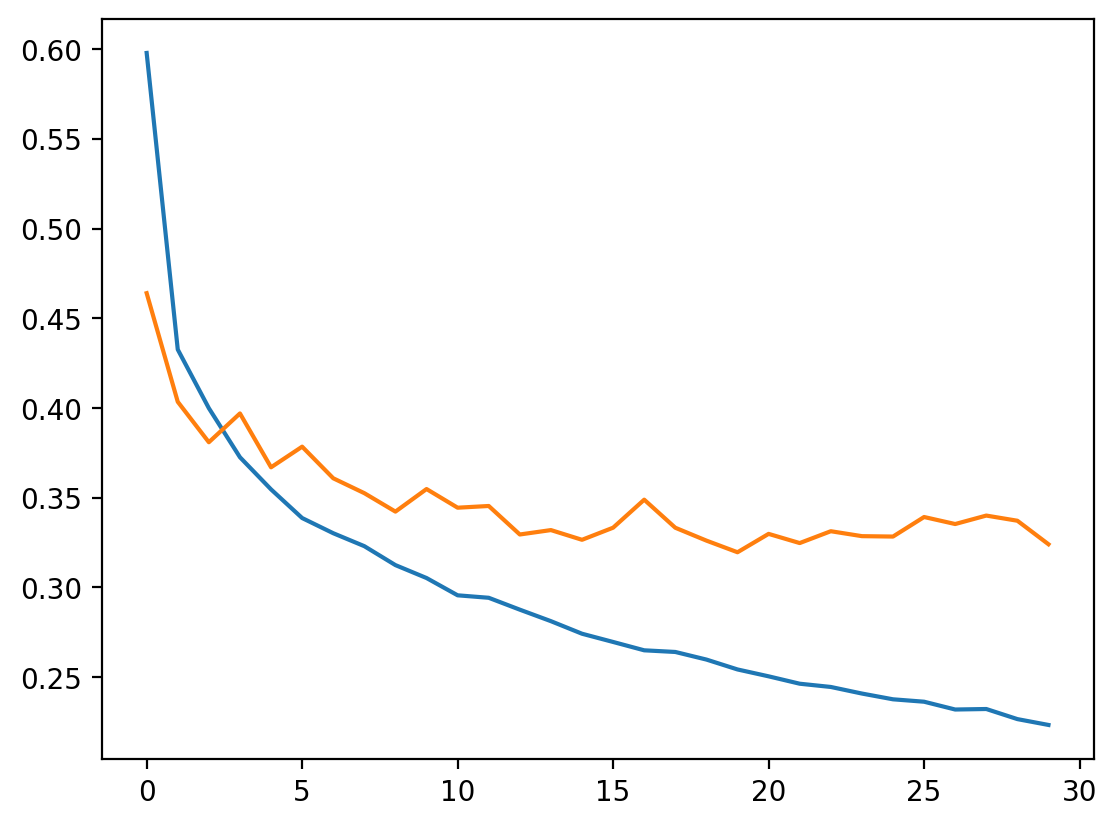

In [68]:
plt.plot(train_losses, label = 'Training loss')
plt.plot(test_losses, label = 'Testing loss')
plt.plot(frameon = False)

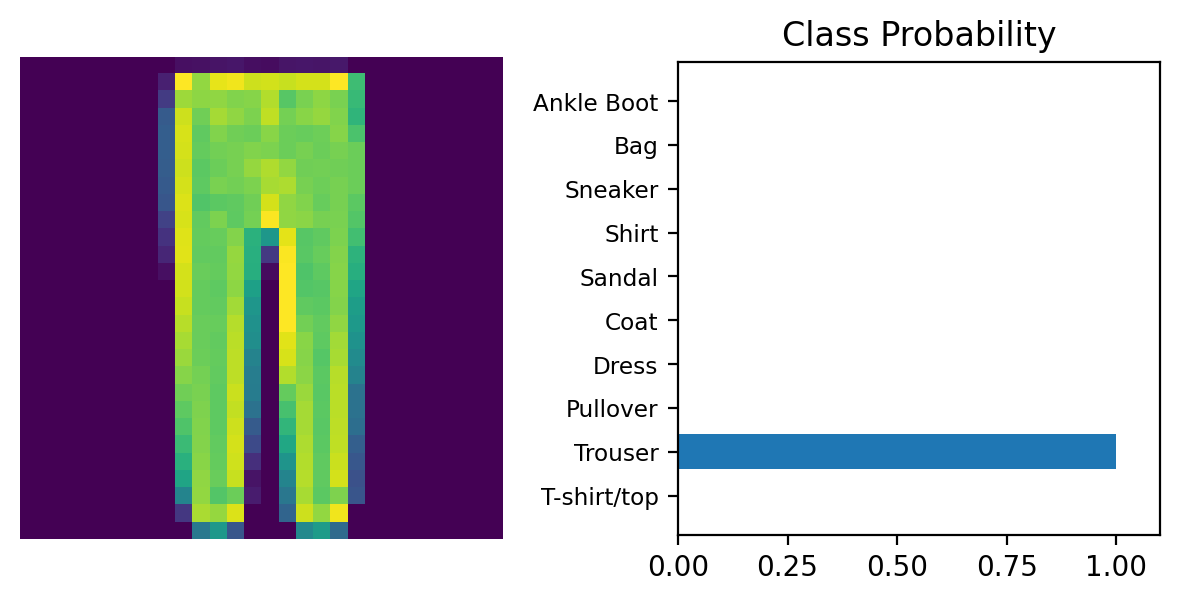

In [69]:
images, labels = next(iter(testloader))
img = images[10].view(1, 784)

with torch.no_grad():
  logits = model.forward(img)

ps = F.softmax(logits, dim=1)
view_classify(img.view(1,28,28), ps, version = 'Fashion')